## CAB420 Final Assignment


# Importing Library and Read Data from CSV files


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Spliting data to trainning and testing set
from sklearn.model_selection import train_test_split
# Fitting Multiple Linear Regression to the trainning set
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

In [2]:
# Import dataset
rating_dataset = pd.read_csv("./data/ratings.csv")
movies_dataset = pd.read_csv("./data/movies.csv")

# Set the index by movieId, This line of code only able to execute once
movies_dataset.set_index('movieId', inplace = True)

# Convert genres to dummy variable dataset
# movies_genres_dummy <- a dataframe contains the genres values for all the movies and using movieId as index
movies_genres_dummy = movies_dataset['genres'].str.get_dummies(sep='|')
# Remove (no genres listed) from dummy because all 0 can represent (no genres listed)
movies_genres_dummy = movies_genres_dummy.drop(columns=["(no genres listed)"], axis=1)


# Use this If you think you are able to work on the years 
# Cannot use year as parameter because in movie 3xxxx there is a movie does not have years
# movies_dataset["year"] = movies_dataset["title"].str.extract(r"\(([0-9]+)\)").astype(dtype=np.int)

# Pre Processing for KMeans Algorithm finding the similar movies
movies_dataset = movies_dataset.drop(columns=["genres"], axis=1)
movies_dataset = pd.merge(movies_dataset, movies_genres_dummy, on = 'movieId', how = "left")

movies_dataset.head()

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Combine Rating and Movie Dataset to one Dataset

In [3]:
full_rating_dataset = pd.merge(rating_dataset[["userId","movieId","rating"]], movies_genres_dummy, on = 'movieId', how = "left")
full_rating_dataset.head()

,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


## Linear Regression for Predicting a user how many marks will he/she giving to a movie according to he/she previous rating to other movie and the others how they rate this movie


In [4]:
X_df = full_rating_dataset.drop(columns=['rating','movieId'], axis=1)
y_df = full_rating_dataset.iloc[:,2]

X = X_df.values
y = y_df.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_pred.round()

array([4., 3., 3., ..., 4., 3., 3.])

In [5]:
y_test

array([4.5, 3. , 3. , ..., 4.5, 3. , 3. ])

In [6]:
regressor.score(X_test,y_test)

0.044662990586502915

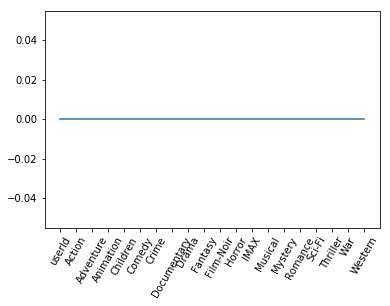

In [7]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X,y)
lasso_coef = lasso.coef_

columns = X_df.columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns.values, rotation = 60)
plt.show()

In [8]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-2.78812516e-04 -1.22037010e-01  1.04131942e-01  3.35995180e-01
 -2.72306558e-01 -1.28200001e-01  2.13193385e-01  3.69731926e-01
  1.94055687e-01  4.26721260e-02  2.35369317e-01 -1.77342457e-01
  9.75925175e-02  8.36770540e-02  1.10680260e-01  2.15526856e-02
  3.44916289e-02 -4.83091842e-02  2.64703975e-01  1.07404490e-01]
Mean squared error: 1.05
Variance score: 0.04


In [9]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

In [10]:
X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        23:19:59   Log-Likelihood:            -1.1602e+05
No. Observations:               80668   AIC:                         2.321e+05
Df Residuals:                   80647   BIC:                         2.323e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5143      0.013    274.852      0.000       3.489       3.539
x1            -0.0003   1.97e-05    -14.180      0.000      -0.000      -0.000
x2            -0.1220      0.010    -12.511      0.000      -0.141      -0.103
x3             0.1041      0.010     10.193      0.000       0.084       0.124
x4             0.3360      0.019     17.979      0.000       0.299       0.373
x5            -0.2723      0.017    -15.955      0.000      -0.306      -0.239
x6            -0.1282      0.009    -14.011      0.000      -0.146      -0.110
x7             0.2132      0.011     19.610      0.000       0.192       0.235
x8             0.3697      0.034     10.947      0.000       0.304       0.436
x9             0.1941      0.009     21.661      0.000       0.176       0.212
x10            0.0427      0.012      3.475      0.001       0.019       0.067
x11            0.2354      0.040      5.903      0.000       0.157       0.314
x12           -0.1773      0.015    -11.922      0.000      -0.206      -0.148
x13            0.0976      0.019      5.183      0.000       0.061       0.134
x14            0.0837      0.020      4.284      0.000       0.045       0.122
x15            0.1107      0.015      7.575      0.000       0.082       0.139
x16            0.0216      0.010      2.131      0.033       0.002       0.041
x17            0.0345      0.011      3.164      0.002       0.013       0.056
x18           -0.0483      0.010     -4.889      0.000      -0.068      -0.029
x19            0.2647      0.018     15.052      0.000       0.230       0.299
x20            0.1074      0.027      4.030      0.000       0.055       0.160
==============================================================================
Omnibus:                     4333.607   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5061.436
Skew:                          -0.606   Prob(JB):                         0.00
Kurtosis:                       3.187   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression for predicting a user will rate to a new movies according to the previous rating he gave to the other movies only

In [11]:
# Randomly Generate a user for doing linear regression to predict what will he / she giving the rating on a movie
userID = random.randint(1, full_rating_dataset['userId'].max() + 1)

rating_df_for_one_user = full_rating_dataset.loc[(full_rating_dataset.userId == userID)]

X_df = rating_df_for_one_user.drop(columns=['rating','userId','movieId'], axis=1)
X = X_df.values

y_df = rating_df_for_one_user.iloc[:,2]
y = y_df.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_pred.round()

array([3., 4., 5., 5., 3., 5.])

In [12]:
y_test

array([2., 3., 3., 3., 4., 3.])

In [13]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.25000000e+00 -1.25000000e+00  1.75000000e+00 -1.50000000e-01
 -3.50000000e-01 -1.50000000e-01 -6.38378239e-16 -8.50000000e-01
  5.00000000e-01  3.60822483e-16 -2.22044605e-16  0.00000000e+00
  0.00000000e+00  8.00000000e-01  4.00000000e-01  6.50000000e-01
  5.00000000e-02  0.00000000e+00  0.00000000e+00]
Mean squared error: 2.13
Variance score: -5.38


In [14]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     2.865
Date:                Sat, 25 May 2019   Prob (F-statistic):             0.0610
Time:                        23:19:59   Log-Likelihood:                -5.6353
No. Observations:                  22   AIC:                             37.27
Df Residuals:                       9   BIC:                             51.45
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5000      0.564      6.202      0.000       2.223       4.777
x1             1.2500      0.509      2.457      0.036       0.099       2.401
x2            -1.2500      0.623     -2.006      0.076      -2.659       0.159
x3             1.7500      1.206      1.452      0.181      -0.977       4.477
x4            -0.1500      0.532     -0.282      0.784      -1.353       1.053
x5            -0.3500      0.532     -0.658      0.527      -1.553       0.853
x6            -0.1500      0.642     -0.234      0.820      -1.602       1.302
x7         -1.049e-15   4.68e-16     -2.241      0.052   -2.11e-15    9.96e-18
x8            -0.8500      0.701     -1.212      0.256      -2.436       0.736
x9             0.5000      0.726      0.688      0.509      -1.143       2.143
x10        -2.035e-17   1.22e-16     -0.166      0.872   -2.97e-16    2.56e-16
x11        -2.656e-17   1.28e-16     -0.207      0.841   -3.17e-16    2.64e-16
x12        -6.857e-18    2.7e-17     -0.254      0.805   -6.79e-17    5.42e-17
x13                 0          0        nan        nan           0           0
x14            0.8000      0.651      1.229      0.250      -0.673       2.273
x15            0.4000      0.472      0.847      0.419      -0.668       1.468
x16            0.6500      0.365      1.780      0.109      -0.176       1.476
x17            0.0500      0.394      0.127      0.902      -0.841       0.941
x18                 0          0        nan        nan           0           0
x19                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       13.595   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.219
Skew:                           1.491   Prob(JB):                      0.00222
Kurtosis:                       5.107   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
X_df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
41019,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
41020,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
41021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
41022,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41023,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
regressor.score(X_test,y_test)

-5.383749999999998

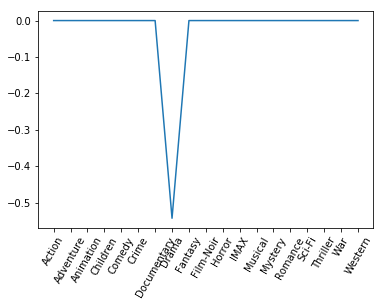

In [17]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_test,y_test)
lasso_coef = lasso.coef_

columns = X_df.columns.values
columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns, rotation = 60)
plt.show()

# K-Means Algorithm Clustering Similar Movies

In [18]:
# The dataset will use in this case
movies_dataset.head()

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


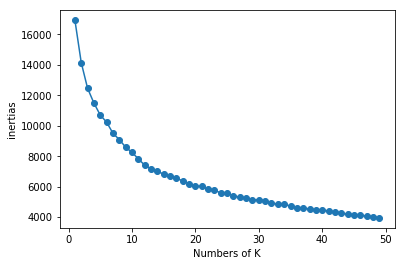

In [19]:
# X only contains movie genres values
X = movies_dataset.iloc[:,1:].values

# Performs K = 1 to 50 for clustering the data
Ks = range(1,50)
# Array for saving inertias values for each K Clustering
inertias = []

# Loop K times 
for k in Ks:
    # Create KMeans
    model = KMeans(n_clusters = k)
    # Train KMeans 
    model.fit(X)
    inertias.append(model.inertia_)

# Plot inertias values vs K numbers 
plt.ylabel("inertias")
plt.xlabel("Numbers of K")
plt.plot(Ks,inertias,'-o')

## We Can see the result from the graph. The numbers of Inertias are dramatically decreased when k= 1 to k = 20, from 16000 to 6000. Then it becomes slow, from 6000 to 4000 when k = 21 to k=50. We should choose K = 20 in this case


In [20]:
# Create KMeans Algorithm to cluster the data in 20 groups 
model = KMeans(n_clusters = 20)

# Train KMeans
model.fit(X)

# Get the cluster values for each movie
labels = model.predict(X)

# Put the cluster value back to the dataset
movies_dataset['cluster'] = labels

# Save it into a new csv file, you can view the result in this csv file
movies_dataset.sort_values(by=['cluster']).to_csv("MovieCluster.csv")

## Hierarchy Clustering Similar Users


We need to create a new dataframe from the full rating dataset
The new dataframe should contains all the average rating the user previous rating for all the genre

In [62]:
# Previous full rating dataframe
full_rating_dataset
full_rating_dataset['userId'][0]

1

In [85]:
def generate_avg_rating_df():
    #genres_list includes ['Action', 'Adventure', 'Animation', 'Children', etc...]
    genres_list = movies_genres_dummy.columns.values

    # Columns name variable for creating the new dataframe
    columns_name = ["userId"]
    # Create Columns name array
    for genres in genres_list:
        columns_name.append("AVG_" + genres + "_Rating")

    # initialize the dataframe     
    df = pd.DataFrame(columns=columns_name)

    for userId in range(1,full_rating_dataset['userId'].max() + 1):
        row_values = { 'userId': userId }
        for idx , genre in enumerate(genres_list):
            # Getting the user Dataframe for calculating the avg value for this genre
            user_df = full_rating_dataset.loc[(full_rating_dataset["userId"] == userId) & (full_rating_dataset[genre] == 1) ]
            # calculating the avg value for this genre
            avg = user_df["rating"].mean()

            row_values.update( { columns_name[idx + 1] : avg} )
            
        df = df.append( pd.Series(row_values), ignore_index = True )
    
    return df.fillna(0)


In [86]:
# generate avg rating dataframe
avg_df = generate_avg_rating_df()

avg_df

,userId,AVG_Action_Rating,AVG_Adventure_Rating,AVG_Animation_Rating,AVG_Children_Rating,AVG_Comedy_Rating,AVG_Crime_Rating,AVG_Documentary_Rating,AVG_Drama_Rating,AVG_Fantasy_Rating,AVG_Film-Noir_Rating,AVG_Horror_Rating,AVG_IMAX_Rating,AVG_Musical_Rating,AVG_Mystery_Rating,AVG_Romance_Rating,AVG_Sci-Fi_Rating,AVG_Thriller_Rating,AVG_War_Rating,AVG_Western_Rating
0,1.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,NaN,4.529412,4.297872,5.000000,3.470588,NaN,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714
1,2.0,3.954545,4.166667,NaN,NaN,4.000000,3.800000,4.333333,3.882353,NaN,NaN,3.000000,3.750000,NaN,4.000000,4.500000,3.875000,3.700000,4.500000,3.500000
2,3.0,3.571429,2.727273,0.500000,0.500000,1.000000,0.500000,NaN,0.750000,3.375000,NaN,4.687500,NaN,0.500000,5.000000,0.500000,4.200000,4.142857,0.500000,NaN
3,4.0,3.320000,3.655172,4.000000,3.800000,3.509615,3.814815,4.000000,3.483333,3.684211,4.000000,4.250000,3.000000,4.000000,3.478261,3.379310,2.833333,3.552632,3.571429,3.800000
4,5.0,3.111111,3.250000,4.333333,4.111111,3.466667,3.833333,NaN,3.800000,4.142857,NaN,3.000000,3.666667,4.400000,4.000000,3.090909,2.500000,3.555556,3.333333,3.000000
5,6.0,3.609375,3.893617,4.071429,3.617021,3.370079,3.285714,NaN,3.614286,3.538462,2.500000,3.263158,4.666667,4.166667,3.733333,3.614286,3.476190,3.544118,3.583333,3.818182
6,7.0,3.257812,3.314815,3.392857,3.200000,3.163265,3.307692,NaN,3.131579,3.065217,3.250000,4.000000,2.454545,3.666667,3.178571,2.650000,3.154762,3.430233,3.291667,1.500000
7,8.0,3.333333,3.545455,5.000000,4.250000,3.208333,3.888889,NaN,3.789474,3.250000,NaN,4.500000,4.500000,5.000000,4.000000,3.500000,3.250000,3.750000,3.666667,3.000000
8,9.0,3.125000,3.800000,4.000000,4.000000,3.666667,3.142857,NaN,3.428571,5.000000,4.000000,1.800000,3.000000,3.000000,4.000000,3.166667,3.000000,2.545455,3.500000,4.000000
9,10.0,3.500000,3.580645,3.866667,3.607143,3.265823,3.115385,NaN,3.152778,3.441176,NaN,1.750000,3.361111,3.333333,2.166667,3.333333,2.000000,3.076923,3.750000,NaN


,userId,AVG_Action_Rating,AVG_Adventure_Rating,AVG_Animation_Rating,AVG_Children_Rating,AVG_Comedy_Rating,AVG_Crime_Rating,AVG_Documentary_Rating,AVG_Drama_Rating,AVG_Fantasy_Rating,AVG_Film-Noir_Rating,AVG_Horror_Rating,AVG_IMAX_Rating,AVG_Musical_Rating,AVG_Mystery_Rating,AVG_Romance_Rating,AVG_Sci-Fi_Rating,AVG_Thriller_Rating,AVG_War_Rating,AVG_Western_Rating
0,1.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.000000,4.529412,4.297872,5.000000,3.470588,0.000000,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714
1,2.0,3.954545,4.166667,0.000000,0.000000,4.000000,3.800000,4.333333,3.882353,0.000000,0.000000,3.000000,3.750000,0.000000,4.000000,4.500000,3.875000,3.700000,4.500000,3.500000
2,3.0,3.571429,2.727273,0.500000,0.500000,1.000000,0.500000,0.000000,0.750000,3.375000,0.000000,4.687500,0.000000,0.500000,5.000000,0.500000,4.200000,4.142857,0.500000,0.000000
3,4.0,3.320000,3.655172,4.000000,3.800000,3.509615,3.814815,4.000000,3.483333,3.684211,4.000000,4.250000,3.000000,4.000000,3.478261,3.379310,2.833333,3.552632,3.571429,3.800000
4,5.0,3.111111,3.250000,4.333333,4.111111,3.466667,3.833333,0.000000,3.800000,4.142857,0.000000,3.000000,3.666667,4.400000,4.000000,3.090909,2.500000,3.555556,3.333333,3.000000
5,6.0,3.609375,3.893617,4.071429,3.617021,3.370079,3.285714,0.000000,3.614286,3.538462,2.500000,3.263158,4.666667,4.166667,3.733333,3.614286,3.476190,3.544118,3.583333,3.818182
6,7.0,3.257812,3.314815,3.392857,3.200000,3.163265,3.307692,0.000000,3.131579,3.065217,3.250000,4.000000,2.454545,3.666667,3.178571,2.650000,3.154762,3.430233,3.291667,1.500000
7,8.0,3.333333,3.545455,5.000000,4.250000,3.208333,3.888889,0.000000,3.789474,3.250000,0.000000,4.500000,4.500000,5.000000,4.000000,3.500000,3.250000,3.750000,3.666667,3.000000
8,9.0,3.125000,3.800000,4.000000,4.000000,3.666667,3.142857,0.000000,3.428571,5.000000,4.000000,1.800000,3.000000,3.000000,4.000000,3.166667,3.000000,2.545455,3.500000,4.000000
9,10.0,3.500000,3.580645,3.866667,3.607143,3.265823,3.115385,0.000000,3.152778,3.441176,0.000000,1.750000,3.361111,3.333333,2.166667,3.333333,2.000000,3.076923,3.750000,0.000000
